# Stack overflow survey analysis

## We will analyse to find out the following:

1. What is the participant count by country?
2. What is the education level by country?
3. What is the average salary by country?
4. What is the average salary by education level?
5. What is the most and least used programming language?

### Load data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# from helpers import file_splitter

# split larger than 100MB file into smaller chunks
# file_splitter.split_csv_file("analysis/stackoverflow_survey/data/stack-overflow-developer-survey-2022/survey_results_public.csv")

pd.set_option("display.max_columns", 80)

plt.style.use("fivethirtyeight")

df1 = pd.read_csv("analysis/stackoverflow_survey/data/stack-overflow-developer-survey-2022/survey_results_public.csv_1.csv")
df2 = pd.read_csv("analysis/stackoverflow_survey/data/stack-overflow-developer-survey-2022/survey_results_public.csv_2.csv")

df = pd.concat([df1, df2])


df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

### Interested columns

* ResponseId -> unique id
* EdLevel -> Education level
* Country
* ConvertedCompYearly -> Salary in USD
* LanguageHaveWorkedWith 
* Age
* Gender


In [26]:
analysis_df = df[["ResponseId", "EdLevel", "Country", "ConvertedCompYearly", "LanguageHaveWorkedWith", "Age", "Gender"]]
analysis_df.set_index("ResponseId", inplace=True)

# Fill missing values with sensible defaults
analysis_df["EdLevel"].fillna("Unknown", inplace=True)
analysis_df["Country"].fillna("Unknown", inplace=True)
analysis_df["LanguageHaveWorkedWith"].fillna("", inplace=True)
analysis_df["Gender"].fillna("Unknown", inplace=True)


analysis_df.head()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,EdLevel,Country,ConvertedCompYearly,LanguageHaveWorkedWith,Age,Gender
ResponseId,,,,,,
1,Unknown,Unknown,NaN,,NaN,Unknown
2,Unknown,Canada,NaN,JavaScript;TypeScript,NaN,Unknown
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,40205.0,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old,Man
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Israel,215232.0,C#;JavaScript;SQL;TypeScript,35-44 years old,Man
5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,Unknown


### 1. What is the participant count by country?

Text(0, 0.5, 'Participants')

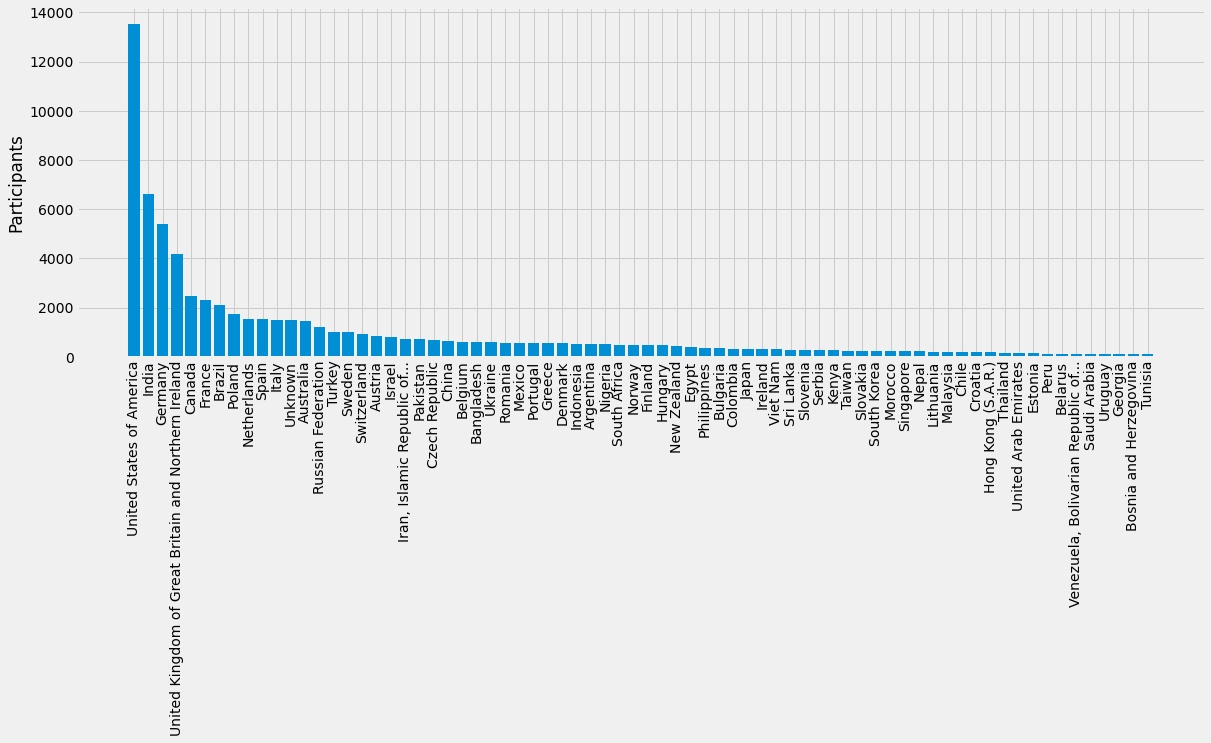

In [58]:
devs_by_country = analysis_df.groupby("Country").count()[["EdLevel"]]
devs_by_country.rename(columns={"EdLevel": "Participants"}, inplace=True)

devs_by_country.sort_values("Participants", ascending=False, inplace=True)

# drop countries with less than 100 participants

devs_by_country = devs_by_country[devs_by_country["Participants"] >= 100]

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.bar(devs_by_country.index, "Participants", data=devs_by_country)
ax.tick_params(axis="x", rotation=90)
ax.set_ylabel("Participants")